## Exercise 3.1
  
Build a classifier for the MNIST dataset that achieves over 97% accuracy. (Hint: Use KNeighborsClassifier)

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

In [3]:
# Set as_frame = False to get a numpy array instead of the default pandas dataframe
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

In [4]:
X, y = mnist.data, mnist.target

In [5]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
# Make predictions on the test set and evaluate the accuracy
y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
accuracy_score(y_train, y_train_pred)

0.9674166666666667

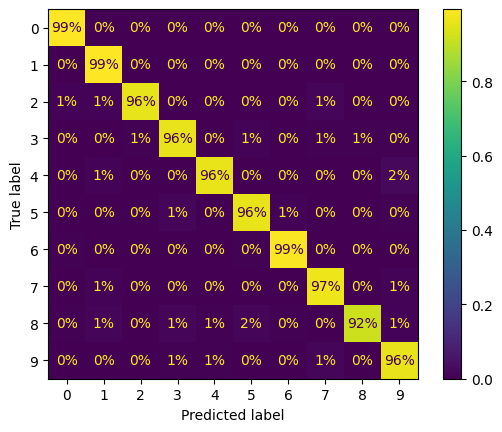

In [8]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize='true', values_format='.0%')
plt.show()

In [10]:
# Accuracy on the test set
y_pred = knn_clf.predict(X_test)
print("Accuracy on the test set: ", accuracy_score(y_test, y_pred))

Accuracy on the test set:  0.9688


In [ ]:
# Use GridSearchCV to find the best hyperparameters
param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8]}]
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)

In [69]:
# Crunching time!
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ....n_neighbors=2, weights=uniform;, score=0.964 total time=   8.7s
[CV 2/5] END ....n_neighbors=2, weights=uniform;, score=0.963 total time=   8.4s
[CV 3/5] END ....n_neighbors=2, weights=uniform;, score=0.962 total time=   8.4s
[CV 4/5] END ....n_neighbors=2, weights=uniform;, score=0.963 total time=   8.2s
[CV 5/5] END ....n_neighbors=2, weights=uniform;, score=0.964 total time=   7.9s
[CV 1/5] END ...n_neighbors=2, weights=distance;, score=0.970 total time=   8.1s
[CV 2/5] END ...n_neighbors=2, weights=distance;, score=0.971 total time=   8.6s
[CV 3/5] END ...n_neighbors=2, weights=distance;, score=0.969 total time=   8.7s
[CV 4/5] END ...n_neighbors=2, weights=distance;, score=0.969 total time=   8.4s
[CV 5/5] END ...n_neighbors=2, weights=distance;, score=0.968 total time=   8.1s
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=   9.1s
[CV 2/5] END ....n_neighbors=3, weights=uniform;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [71]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")

Best parameters: {'n_neighbors': 4, 'weights': 'distance'}
Best score: 0.9716


In [72]:
# Use the best estimator to make predictions on the test set
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714